# TASK 2: CLUSTERING (test #3)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

#### Loading the dataset

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [3]:
df = pd.read_csv(r"csv/seismic_clust.csv", skipinitialspace=True)

In [4]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,...,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy,genergy_S,gpuls_S,gdenergy_S,gdpuls_S,energy_S
0,0.0,0.0,0.0,15180,48,-72,-72,0.0,0,0,...,9.627734,3.871201,3.218876,3.218876,0.000000,-0.344249,-1.651209,-1.593212,-1.761844,0.000000
1,0.0,0.0,0.0,14720,33,-70,-79,0.0,1,0,...,9.596962,3.496508,3.295837,2.890372,7.601402,-0.364671,-1.950436,-1.498307,-2.209817,0.963185
2,0.0,0.0,0.0,8050,30,-81,-78,0.0,0,0,...,8.993427,3.401197,2.772589,2.944439,0.000000,-0.765223,-2.026550,-2.143552,-2.136087,0.000000
3,0.0,0.0,0.0,28820,171,-23,40,0.0,1,0,...,10.268825,5.141664,4.304065,4.919981,8.006701,0.081228,-0.636629,-0.255009,0.557908,1.014541
4,0.0,0.0,0.0,12640,57,-63,-52,0.0,0,0,...,9.444622,4.043051,3.526361,3.806662,0.000000,-0.465776,-1.513971,-1.214037,-0.960295,0.000000


In [5]:
df.shape

(2578, 25)

## Clustering

### Test 3 (genergy, gpuls, gdenergy, gdpuls, energy)

In [6]:
df_1 = pd.DataFrame(data = df, columns=['genergy_S', 'gpuls_S','gdenergy_S','gdpuls_S', 'energy_S'])
df_1.head()

,genergy_S,gpuls_S,gdenergy_S,gdpuls_S,energy_S
0,-0.344249,-1.651209,-1.593212,-1.761844,0.000000
1,-0.364671,-1.950436,-1.498307,-2.209817,0.963185
2,-0.765223,-2.026550,-2.143552,-2.136087,0.000000
3,0.081228,-0.636629,-0.255009,0.557908,1.014541
4,-0.465776,-1.513971,-1.214037,-0.960295,0.000000


In [7]:
sse_list = []
silhouette_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_1)
    sse_list.append( kmeans.inertia_ )
    silhouette_list.append(silhouette_score(df_1, kmeans.labels_))

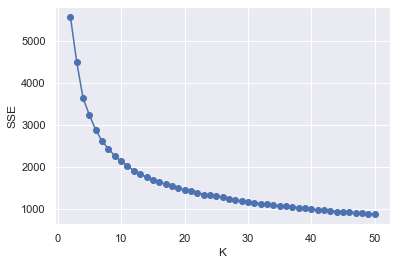

In [8]:
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(sse_list)+2), sse_list, marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

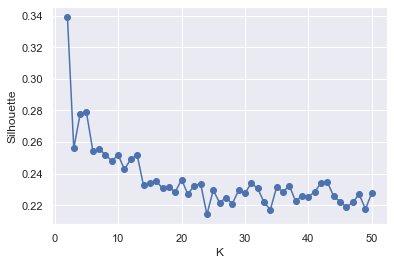

In [9]:
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(silhouette_list)+2), silhouette_list, marker='o')
plt.ylabel('Silhouette')
plt.xlabel("K")
plt.show()

In [10]:
kmeans = KMeans( n_clusters=4, n_init=10, max_iter=100, init="k-means++")
kmeans.fit(df_1)

KMeans(max_iter=100, n_clusters=4)

In [11]:
kmeans.labels_

array([3, 3, 3, ..., 1, 0, 0])

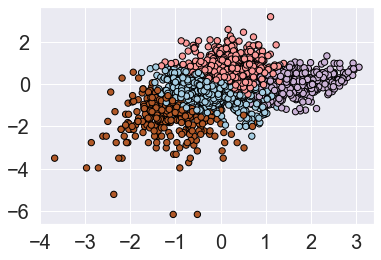

In [12]:
plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= kmeans.labels_ , cmap="Paired")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [13]:
centers = kmeans.cluster_centers_

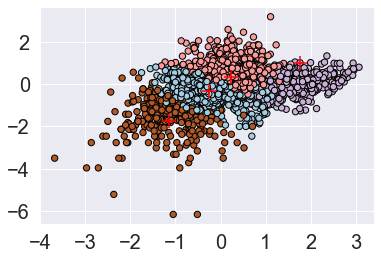

In [14]:
plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= kmeans.labels_ , cmap="Paired")
plt.scatter( centers[:,0], centers[:,1], c='red', marker='+', s=200 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

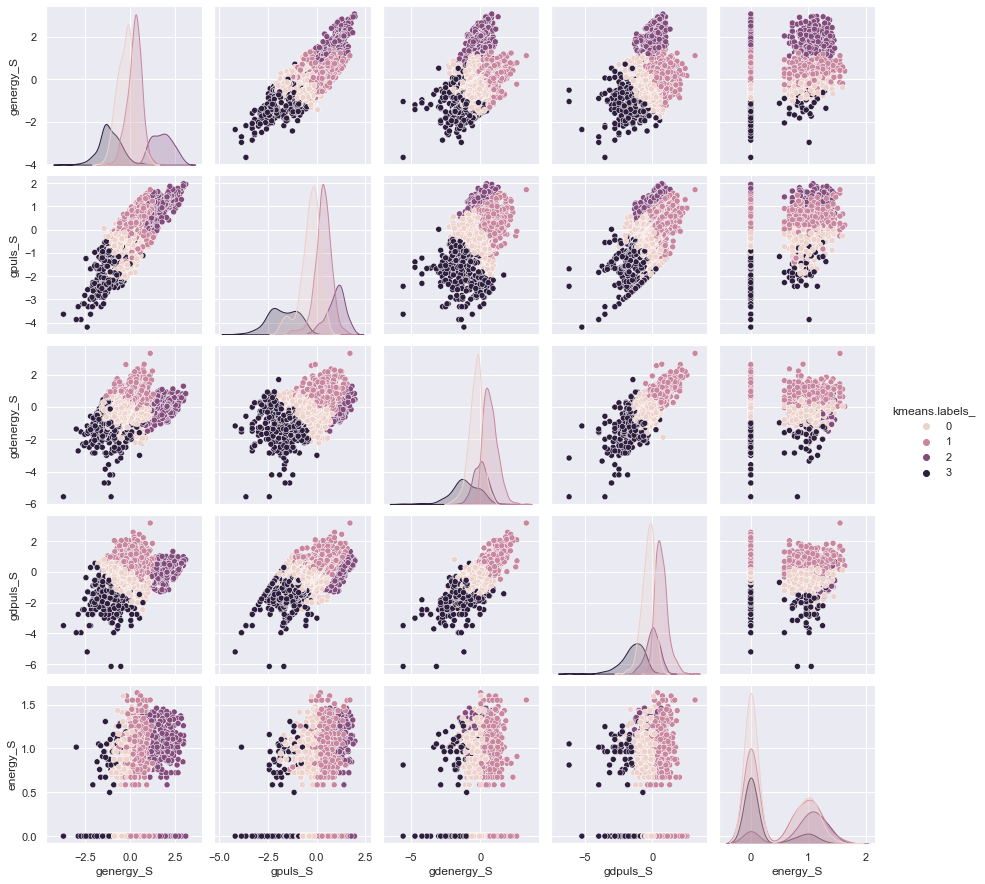

In [15]:
df_1X = df_1.copy(deep=True)

df_1X['kmeans.labels_'] = kmeans.labels_
sns.pairplot(df_1X, hue='kmeans.labels_')

C:\Users\Cosimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

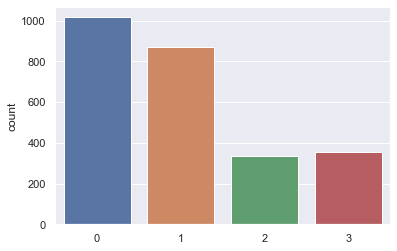

In [16]:
sns.countplot(kmeans.labels_)

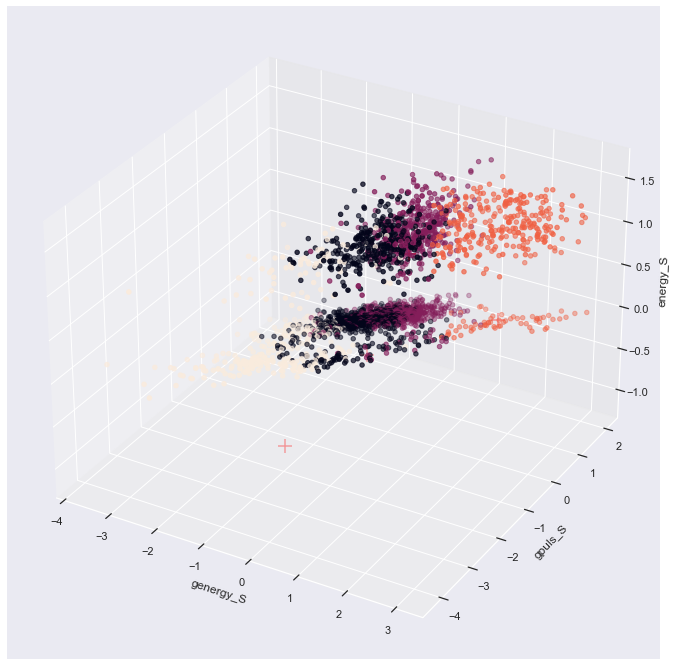

In [17]:
fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gpuls_S'
z = 'energy_S'

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=kmeans.labels_, marker='o')
ax.scatter( centers[:,0], centers[:,1], centers[:,2], c='red', marker='+', s=200 )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

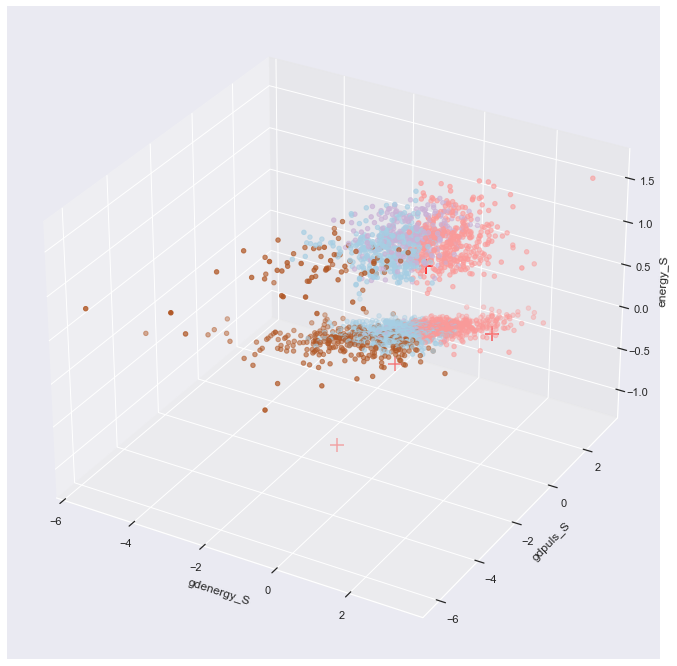

In [18]:
fig = plt.figure(figsize = (16,12))

x = 'gdenergy_S'
y = 'gdpuls_S'
z = 'energy_S'

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=kmeans.labels_, marker='o', cmap="Paired")
ax.scatter( centers[:,0], centers[:,1], centers[:,2], c='red', marker='+', s=200 )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

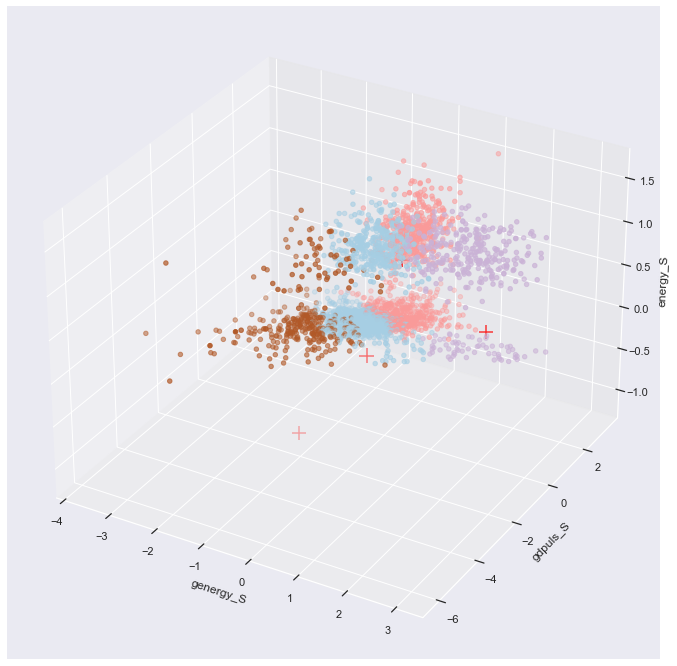

In [19]:
fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gdpuls_S'
z = 'energy_S'

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=kmeans.labels_, marker='o', cmap="Paired")
ax.scatter( centers[:,0], centers[:,1], centers[:,2], c='red', marker='+', s=200 )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

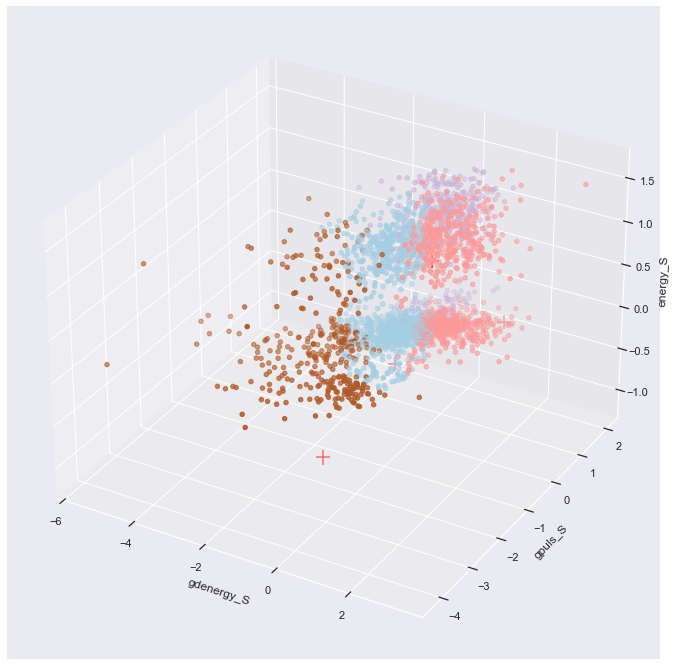

In [20]:
fig = plt.figure(figsize = (16,12))

x = 'gdenergy_S'
y = 'gpuls_S'
z = 'energy_S'

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=kmeans.labels_, marker='o', cmap="Paired")
ax.scatter( centers[:,0], centers[:,1], centers[:,2], c='red', marker='+', s=200 )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

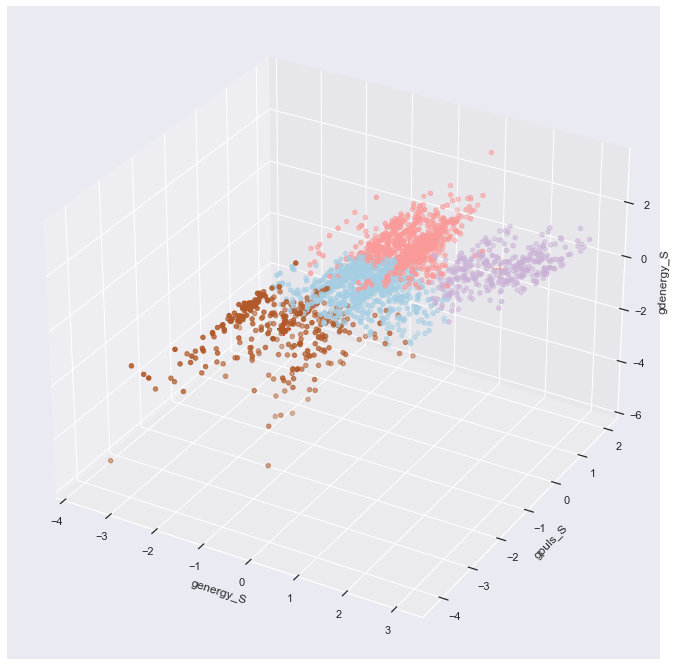

In [21]:
fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gpuls_S'
z = 'gdenergy_S'

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=kmeans.labels_, marker='o', cmap="Paired")
ax.scatter( centers[:,0], centers[:,1], centers[:,2], c='red', marker='+', s=200 )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

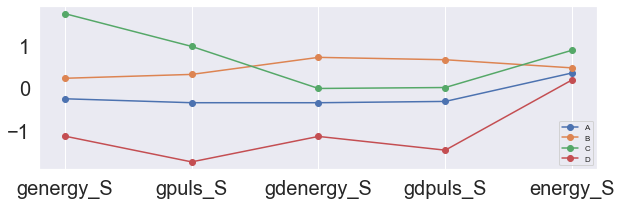

In [22]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C', 'D']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks([0, 1, 2, 3, 4], df_1, fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=8, loc='best')
plt.grid(axis='y')

In [23]:
df_1['class'] = df['class']

[]

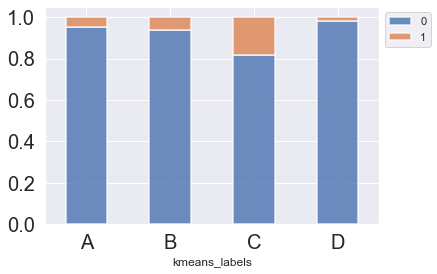

In [24]:
df_1['kmeans_labels'] = kmeans.labels_

bar_pl = df_1['class'].groupby(df_1['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [25]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([1017,  870,  337,  354], dtype=int64))

### DBScan

### Grid search

In [54]:
from sklearn.neighbors import NearestNeighbors

In [99]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(5, 100, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


In [100]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [101]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [102]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_1, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.352    3
  2 | Tested with eps = 0.1 and min_samples =  10 |  0.35    0
  3 | Tested with eps = 0.1 and min_samples =  15 |  0.35    0
  4 | Tested with eps = 0.1 and min_samples =  20 |  0.35    0
  5 | Tested with eps = 0.1 and min_samples =  25 |  0.35    0
  6 | Tested with eps = 0.1 and min_samples =  30 |  0.35    0
  7 | Tested with eps = 0.1 and min_samples =  35 |  0.35    0
  8 | Tested with eps = 0.1 and min_samples =  40 |  0.35    0
  9 | Tested with eps = 0.1 and min_samples =  45 |  0.35    0
 10 | Tested with eps = 0.1 and min_samples =  50 |  0.35    0
 11 | Tested with eps = 0.1 and min_samples =  55 |  0.35    0
 12 | Tested with eps = 0.1 and min_samples =  60 |  0.35    0
 13 | Tested with eps = 0.1 and min_samples =  65 |  0.35    0
 14 | Tested with eps = 0.1 and min_samples =  70

129 | Tested with eps = 0.7 and min_samples =  75 | 0.488    2
130 | Tested with eps = 0.7 and min_samples =  80 | 0.487    2
131 | Tested with eps = 0.7 and min_samples =  85 | 0.485    2
132 | Tested with eps = 0.7 and min_samples =  90 | 0.484    2
133 | Tested with eps = 0.7 and min_samples =  95 | 0.483    2
134 | Tested with eps = 0.8 and min_samples =   5 | 1.129   10
135 | Tested with eps = 0.8 and min_samples =  10 |  0.92    8
136 | Tested with eps = 0.8 and min_samples =  15 | 0.787    7
137 | Tested with eps = 0.8 and min_samples =  20 | 0.716    6
138 | Tested with eps = 0.8 and min_samples =  25 | 0.707    6
139 | Tested with eps = 0.8 and min_samples =  30 | 0.642    6
140 | Tested with eps = 0.8 and min_samples =  35 | 0.636    6
141 | Tested with eps = 0.8 and min_samples =  40 | 0.611    5
142 | Tested with eps = 0.8 and min_samples =  45 | 0.602    5
143 | Tested with eps = 0.8 and min_samples =  50 | 0.585    5
144 | Tested with eps = 0.8 and min_samples =  55 | 0.5

260 | Tested with eps = 1.4 and min_samples =  65 | 1.204    2
261 | Tested with eps = 1.4 and min_samples =  70 | 1.207    2
262 | Tested with eps = 1.4 and min_samples =  75 | 1.207    2
263 | Tested with eps = 1.4 and min_samples =  80 | 1.206    2
264 | Tested with eps = 1.4 and min_samples =  85 | 1.197    2
265 | Tested with eps = 1.4 and min_samples =  90 | 1.086    2
266 | Tested with eps = 1.4 and min_samples =  95 | 1.016    2
267 | Tested with eps = 1.5 and min_samples =   5 |  2.66    2
268 | Tested with eps = 1.5 and min_samples =  10 | 2.415    2
269 | Tested with eps = 1.5 and min_samples =  15 | 2.415    2
270 | Tested with eps = 1.5 and min_samples =  20 | 2.415    2
271 | Tested with eps = 1.5 and min_samples =  25 | 1.993    2
272 | Tested with eps = 1.5 and min_samples =  30 | 1.914    2
273 | Tested with eps = 1.5 and min_samples =  35 | 1.759    2
274 | Tested with eps = 1.5 and min_samples =  40 | 1.612    2
275 | Tested with eps = 1.5 and min_samples =  45 | 1.5

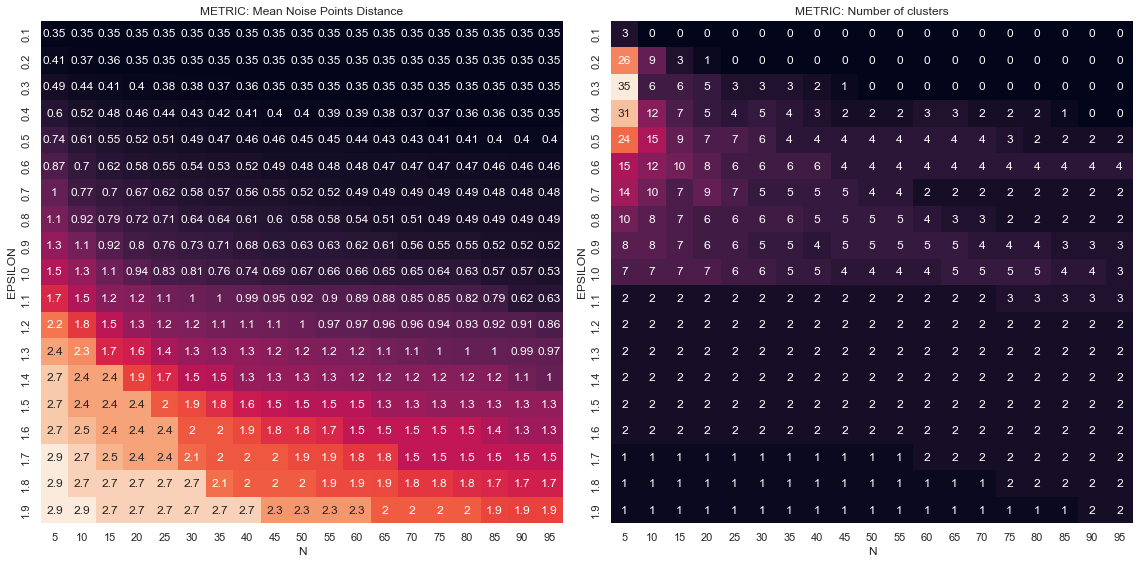

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

#### DBScan (Grid search) minsample= 35 eps =0.4

In [140]:
dist = pdist(df_1, 'euclidean')
dist = squareform(dist)

k=60
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

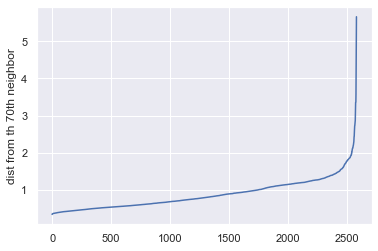

In [141]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 70th neighbor')
         
plt.show()

In [142]:
dbscan = DBSCAN(eps=0.8, min_samples=60)
dbscan.fit(df_1)

DBSCAN(eps=0.8, min_samples=60)

In [143]:
dbscan.labels_

array([-1, -1, -1, ...,  2,  0,  0], dtype=int64)

In [144]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([737, 855, 133, 775,  78], dtype=int64))

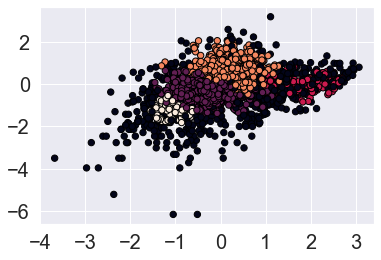

In [145]:
plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

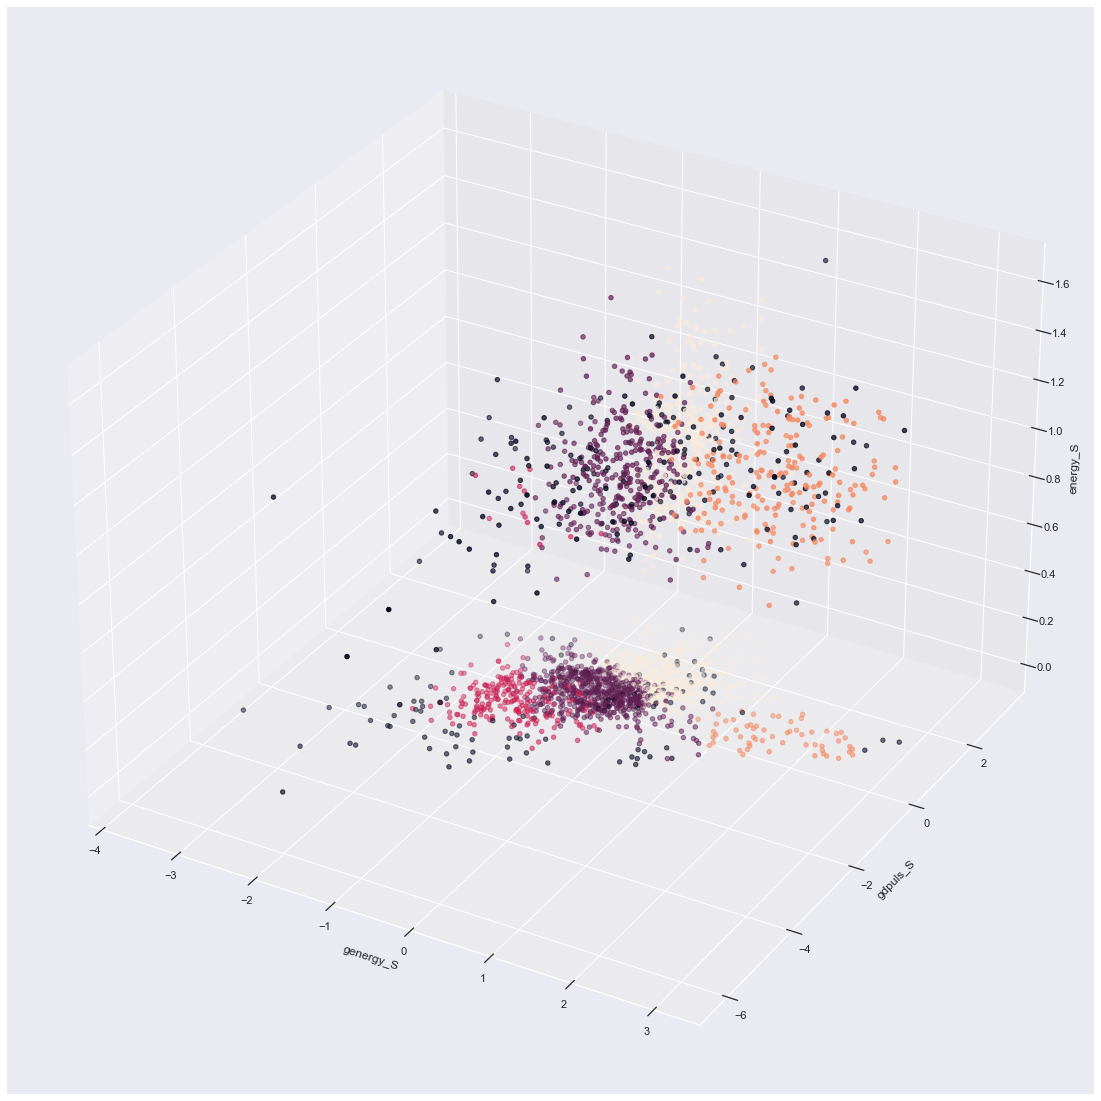

In [98]:
fig = plt.figure(figsize = (20,20))

x = 'genergy_S'
y = 'gdpuls_S'
z = "energy_S"

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=dbscan.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

#### DBScan minsample(D+1) = 6 eps = 1.0

In [59]:
dist = pdist(df_1, 'euclidean')
dist = squareform(dist)

k=6
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

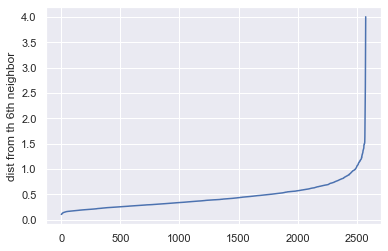

In [60]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 6th neighbor')
         
plt.show()

In [61]:
dbscan = DBSCAN(eps=1.0, min_samples=6)
dbscan.fit(df_1)

DBSCAN(eps=1.0, min_samples=6)

In [62]:
dbscan.labels_

array([0, 0, 0, ..., 3, 1, 1], dtype=int64)

In [63]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 35, 333, 967, 275, 814,  59,  43,  52], dtype=int64))

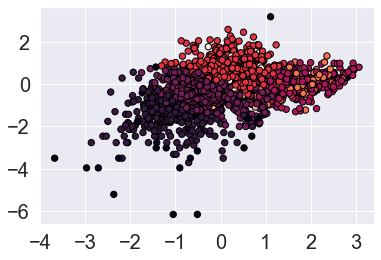

In [64]:
plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

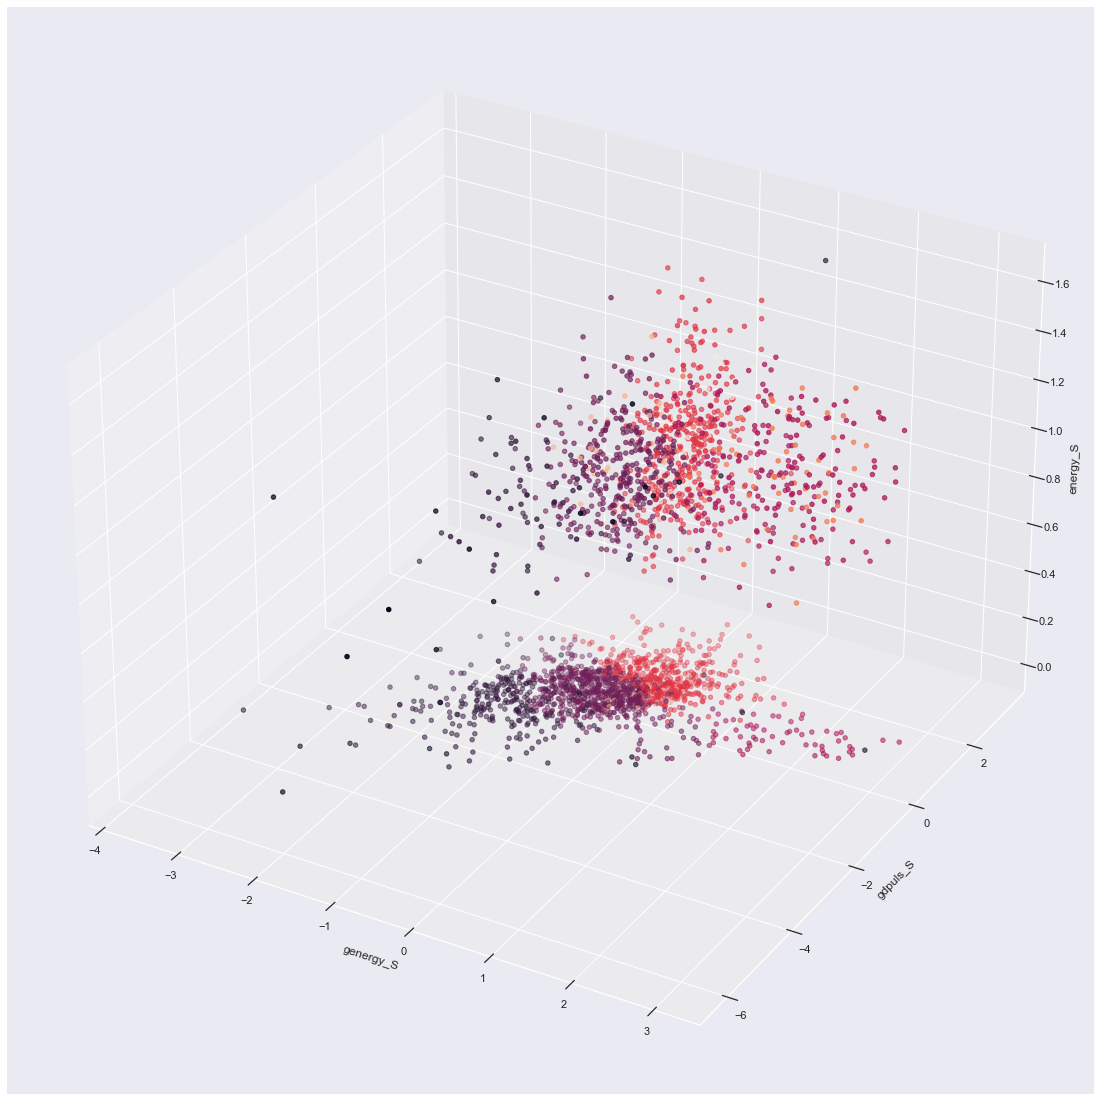

In [65]:
fig = plt.figure(figsize = (20,20))

x = 'genergy_S'
y = 'gdpuls_S'
z = "energy_S"

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=dbscan.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

#### DBScan minsample(D*2) = 10 eps = 1.2

In [66]:
dist = pdist(df_1, 'euclidean')
dist = squareform(dist)

k=10
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

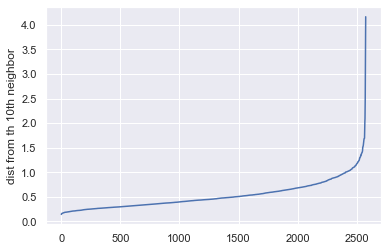

In [67]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 10th neighbor')
         
plt.show()

In [68]:
dbscan = DBSCAN(eps=1.2, min_samples=6)
dbscan.fit(df_1)

DBSCAN(eps=1.2, min_samples=6)

In [69]:
dbscan.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([  10,  347, 2221], dtype=int64))

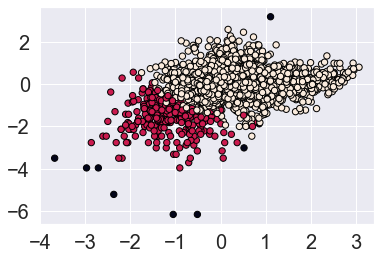

In [71]:
plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

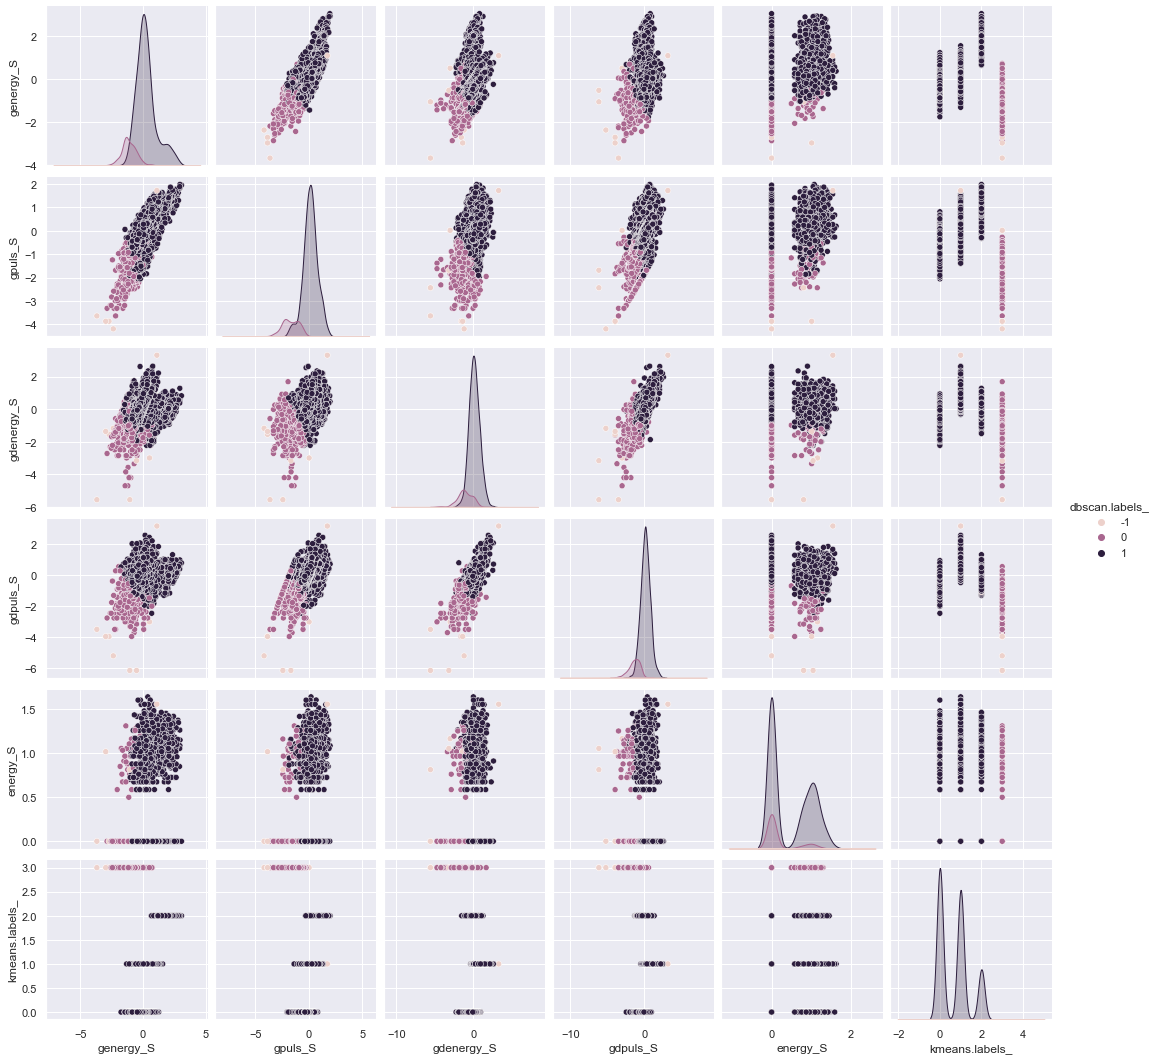

In [72]:
df_1X['dbscan.labels_'] = dbscan.labels_
sns.pairplot(df_1X, hue='dbscan.labels_')

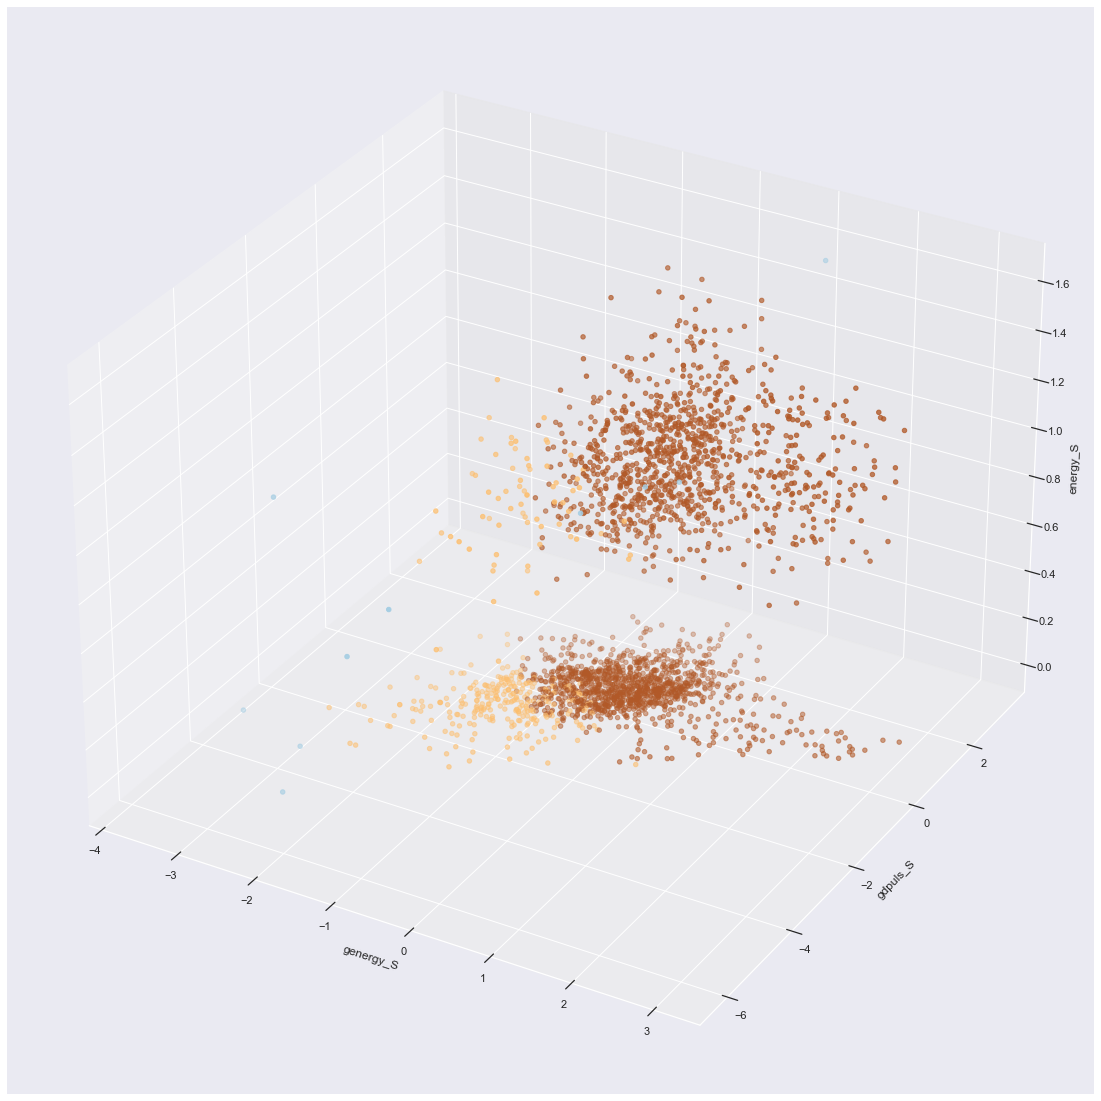

In [73]:
fig = plt.figure(figsize = (20,20))

x = 'genergy_S'
y = 'gdpuls_S'
z = "energy_S"

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=dbscan.labels_, marker='o', cmap="Paired")
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

#### Hierarchical 

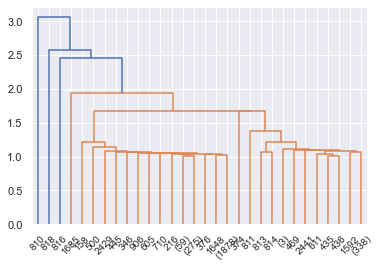

In [74]:
# Single
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='single')
res = dendrogram(data_link, truncate_mode='lastp')

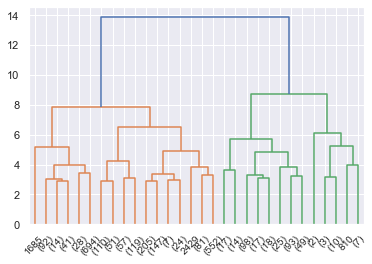

In [75]:
# Complete
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='complete')
res = dendrogram(data_link, truncate_mode='lastp')

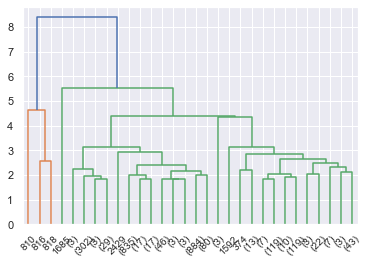

In [76]:
# Average
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='average')
res = dendrogram(data_link, truncate_mode='lastp')

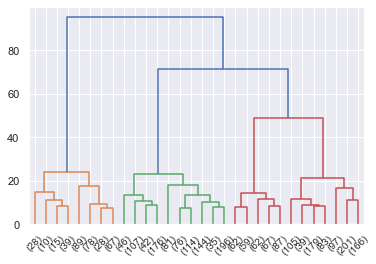

In [77]:
# ward
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='ward')
res = dendrogram(data_link, truncate_mode='lastp')